# Titanic Dataset

In [398]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [399]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [400]:
train.shape, test.shape

((891, 12), (418, 11))

In [401]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [402]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


# Exploratory Data Analysis

In [403]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [404]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [405]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<BarContainer object of 2 artists>

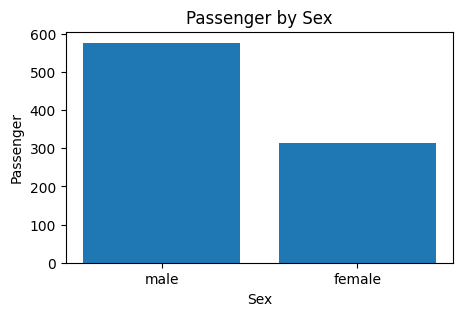

In [406]:
fig = plt.figure(figsize = (5,3))
plt.title("Passenger by Sex")
plt.ylabel("Passenger")
plt.xlabel("Sex")

plt.bar(train['Sex'].value_counts().index,train['Sex'].value_counts().values)

<BarContainer object of 3 artists>

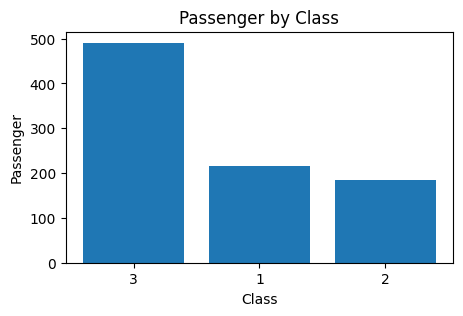

In [407]:
fig = plt.figure(figsize = (5,3))
plt.title("Passenger by Class")
plt.ylabel("Passenger")
plt.xlabel("Class")

plt.bar(train['Pclass'].astype(str).value_counts().index,train['Pclass'].value_counts().values)

<BarContainer object of 7 artists>

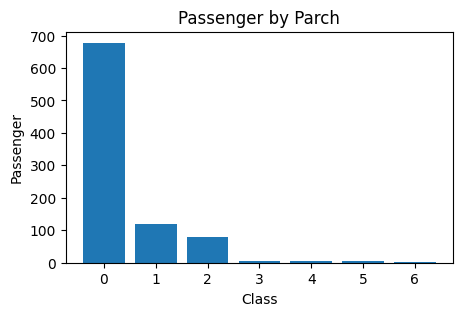

In [408]:
fig = plt.figure(figsize = (5,3))
plt.title("Passenger by Parch")
plt.ylabel("Passenger")
plt.xlabel("Class")

plt.bar(train['Parch'].value_counts().index,train['Parch'].value_counts().values)

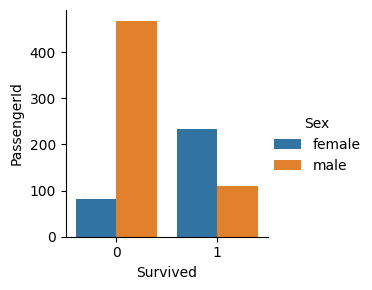

In [409]:
data = train.groupby(['Survived','Sex']).count()['PassengerId'].reset_index()
sns.catplot(data = data, kind = 'bar', x = 'Survived', y = 'PassengerId', hue = 'Sex', height = 3)

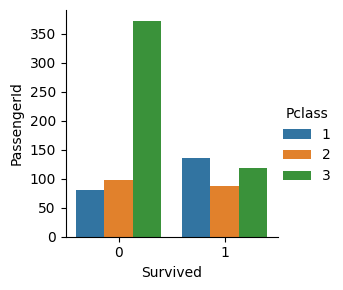

In [410]:
data = train.groupby(['Survived','Pclass']).count()['PassengerId'].reset_index()
sns.catplot(data = data, kind = 'bar', x = 'Survived', y = 'PassengerId', hue = 'Pclass', height = 3)

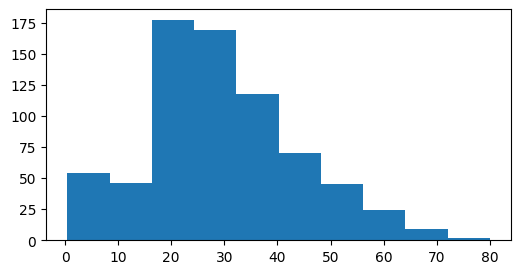

In [411]:
fig, ax = plt.subplots(figsize = (6,3))
ax.hist(train.Age)
plt.show()

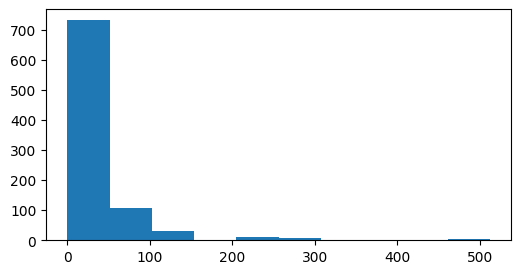

In [412]:
fig, ax = plt.subplots(figsize = (6,3))
ax.hist(train.Fare)
plt.show()

C:\Users\kazuy\AppData\Local\Temp\ipykernel_19540\3242006548.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = train.corr()


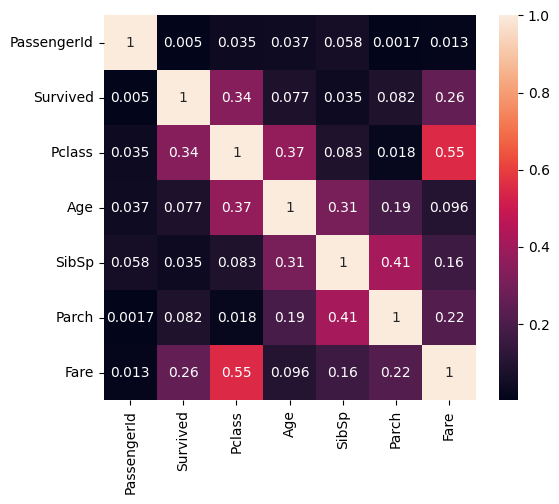

In [413]:
corr = train.corr()
corr = corr.apply(abs)
plt.figure(figsize=(6,5))
map = sns.heatmap(corr,annot=True)

Commentary:
1. Pengumpang selamat kebanyakan adalah perempuan dibandingkan laku-laki, hal ini menunjukkan bahwa awak kapal mengutamakan perempuan dan anak anak dalam evakuasi
2. Pclass rendah renderung tidak selamat dalam evakuasi dibandingkan class yang lebih tinggi, dimungkinkan awak kapan mengutamakan kelas tertinggi terlebih dahulu atau akses ekelas yang lebih rendah lebih sulit unutk dievakuasi.
3. Age & Fare menunjukkan data yang positevely skewed, hal ini akan digunakan untuk pertimbangan imputasi missing values yang ada pada section berikutnya
4. Variabel yang paling berkorelasi dengan survived/tidak adalah Class & Fare, sedangakn SibSp tidak terlalu mempengaruhi.

# Processing Data

In [414]:
#Processing Data Train
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [415]:
#imputasi missing values Embarked & Age menggunakan nilai median :: data menunjukkan positevely skewed 
train['Embarked'] = train['Embarked'].fillna(train['Embarked'].mode())
train['Age'] = train['Age'].fillna(train['Age'].median())

#membuat variable dummies untuk Embarked
embarked_dummies = pd.get_dummies(train[['Embarked']])
train = pd.merge(train.reset_index(), embarked_dummies.reset_index())

#membuat variable dummies untuk Sex
sex_mapping = {'male':0, 'female':1}
train['Sex'] = train['Sex'].map(sex_mapping)

#drop variable yang tidak dibutuhkan :: Cabin drop karena terlalu banyak missing values
train = train.drop(columns=['index','PassengerId','Name','Cabin','Ticket','Embarked'],axis=1)

In [416]:
#Processing Data Test
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [417]:
test['Age'] = test['Age'].fillna(test['Age'].median())
test['Fare'] = test['Fare'].fillna(test['Fare'].median())

embarked_dummies = pd.get_dummies(test[['Embarked']])
test = pd.merge(test.reset_index(), embarked_dummies.reset_index())

sex_mapping = {'male':0, 'female':1}
test['Sex'] = test['Sex'].map(sex_mapping)

test_id = test[['PassengerId']]

test = test.drop(columns=['index','PassengerId','Name','Cabin','Ticket','Embarked'],axis=1)

# Model Selection

In [418]:
x=train.drop(['Survived'],axis=1)
y=train['Survived']

In [419]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=0)

Logistic Regression

In [420]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

In [421]:
log_reg = LogisticRegression()
log_reg.fit(x_train, y_train)

accuracy_score(log_reg.predict(x_test), y_test)

C:\Users\kazuy\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.7937219730941704

Random Forest

In [422]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [423]:
rf = RandomForestClassifier(n_estimators=1000).fit(x_train, y_train)
accuracy_score(rf.predict(x_test), y_test)

0.8340807174887892

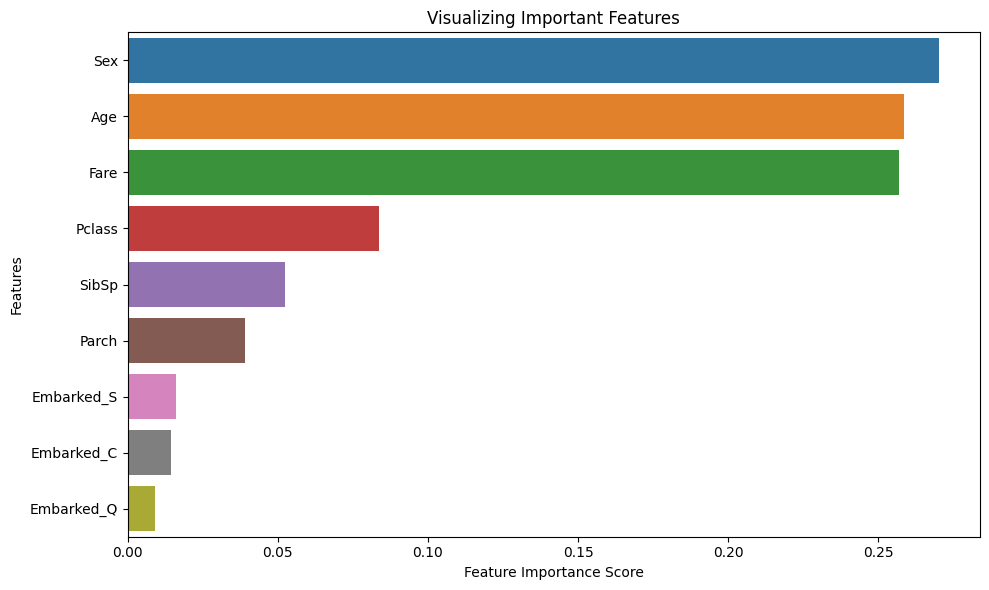

In [424]:
feature_imp = pd.Series(rf.feature_importances_, index=x_train.columns).sort_values(ascending=False)
plt.figure(figsize=(10,6))
sns.barplot(x=feature_imp, y=feature_imp.index)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.tight_layout()

In [428]:
#terlihat dari feature importance Embarked memiliki impact yang rendah untuk penentual survived/tidak :: Embarked dropped
#SibSp dropped :: karena memiliki korelasi paling rendah dengan variable survived

new_x = x.drop(['Embarked_Q','Embarked_S','Embarked_C', 'SibSp'], axis=1)

xx_train, xx_test, yy_train, yy_test = train_test_split(new_train, y, test_size=0.25,random_state=0)
rf2 = RandomForestClassifier(n_estimators=1000).fit(xx_train, yy_train)
accuracy_score(rf2.predict(xx_test), yy_test)

0.8385650224215246

XGBoost

In [360]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV

In [361]:
param_grid = {
'n_estimators': range(6, 10),
'max_depth': range(3, 8),
'learning_rate': [.2, .3, .4],
'colsample_bytree': [.7, .8, .9, 1]
}

xgb = XGBClassifier()
g_search = GridSearchCV(estimator = xgb, param_grid = param_grid,
cv = 3, n_jobs = 1, verbose = 0, return_train_score=True)
g_search.fit(x_train, y_train)
print(g_search.best_params_)

{'colsample_bytree': 0.9, 'learning_rate': 0.4, 'max_depth': 3, 'n_estimators': 8}


In [362]:
g_search.score(x_test,y_test)

0.8430493273542601

# Final Predicton

Accuracy:
- Logistic Regression:79.3%
- Random Forest 1: 83.4%
- Random Forest 2: 83.8%
- XGBoost: 84.3% (dipilih)

In [429]:
pred_final = g_search.predict(test)
pred_final

array([0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [432]:
pred = pd.DataFrame({"PassengerId": test_id['PassengerId'], "Survived": pred_final})
pred.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0


In [433]:
pred.to_csv('submission.csv', index=False)
